#Incremental Capstone1

# Data Preprocessing with Python
## Sessions 1 Tasks

### Task: Import and Export Data, Clean Data

1. **Import relevant Python libraries** necessary for Python programming and Numpy for performing numerical operations.
2. **Import the CSV file** – `NSMES1988.csv` into a dataframe.
3. **Inspect the data** and report the details from physical inspection:
    - Rows
    - Columns
    - Data types, etc.
4. **Check if the data is clean** or if it has missing values.
5. **Comment on the data types**, their values, and range, specifically on the `age` and `income` columns.
6. **Export the data** to JSON format as `NSMES1988.json` and view it. Enter your comments.
7. **Perform memory analysis** on the data and recommend non-default data types to optimize memory usage for the dataframe.
8. **Recommend changes** to the dataframe before attempting detailed data analysis.
9. **Export the dataframe** as a new CSV file `NSMES1988new.csv` and store it locally for future use in other assignments.
10. **Write a short report** on the visual observations of the data.

## Task1: import required Libs

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Data manipulation and visualisation libs imported")


Data manipulation and visualisation libs imported


## Task2: import the data set

In [20]:
# Load the dataset
try:
    df = pd.read_csv('../dataset/NSMES1988.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file path.")
    exit(1)
print("Data Successfully loaded")

Data Successfully loaded


## Task3: visually inspect data

In [21]:

df.head()

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


## Task4: Is data clean, find and fill missing values, drop index columns etc

In [22]:
print("Dropping unnecessary columns")
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)
print("Columns dropped")


Dropping unnecessary columns
Columns dropped


In [23]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(8)
memory usage: 619.7+ KB


Get numeric columns

In [24]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns selected")
# Check for missing values in numeric columns
missing_values = df[numeric_columns].isnull().sum()
# Print the missing values
print("Missing values in numeric columns:")
print(missing_values[missing_values > 0])
print("Missing values checked")


Numeric columns selected
Missing values in numeric columns:
Series([], dtype: int64)
Missing values checked


In [25]:
numeric_columns

Index(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',
       'chronic', 'age', 'school', 'income'],
      dtype='object')

get catagorical columns

In [26]:
catagorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns selected")
# Check for missing values in categorical columns
missing_values_cat = df[catagorical_columns].isnull().sum()
# Print the missing values
print("Missing values in categorical columns:")
print(missing_values_cat[missing_values_cat > 0])
print("Missing values checked")

Categorical columns selected
Missing values in categorical columns:
Series([], dtype: int64)
Missing values checked


In [27]:
catagorical_columns

Index(['health', 'adl', 'region', 'gender', 'married', 'employed', 'insurance',
       'medicaid'],
      dtype='object')

In [30]:
print("Checking for missing values percentage in the dataset")
# Check for missing values in the entire dataset
missing_values_percentage = df.isnull().mean() * 100
# Print the missing values percentage
print("Missing values percentage in the dataset:")
print(missing_values_percentage)
if missing_values_percentage.sum() > 0:
    print("There are missing values in the dataset. Please handle them before proceeding.")
else:
    print("No missing values in the dataset. Proceeding with analysis.")


Checking for missing values percentage in the dataset
Missing values percentage in the dataset:
visits       0.0
nvisits      0.0
ovisits      0.0
novisits     0.0
emergency    0.0
hospital     0.0
health       0.0
chronic      0.0
adl          0.0
region       0.0
age          0.0
gender       0.0
married      0.0
school       0.0
income       0.0
employed     0.0
insurance    0.0
medicaid     0.0
dtype: float64
No missing values in the dataset. Proceeding with analysis.


Summary: There were no missing values

## Task 5: **Comment on the data types**, their values, and range, specifically on the `age` and `income` columns.

In [31]:
df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835100


In [ ]:
df[df['income']<0]

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
909,10,0,0,0,0,0,poor,1,normal,other,7.8,male,yes,12,-1.0125,no,no,no
910,9,2,0,0,0,0,average,1,normal,other,7.5,female,yes,14,-1.0125,no,no,no
2592,6,0,0,0,0,0,average,4,normal,west,6.9,male,yes,6,-0.8180,no,yes,no


summary: negative income looks suspect, and looks like this is a senior citizen facility from age.

## Task 6: **Export the data** to JSON format as `NSMES1988.json` and view it. Enter your comments.

In [ ]:
df.to_json("../dataset/NSMES1988.json", orient="records", lines=True)
print("Data successfully converted to JSON format")


,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


## Storing data in JSON format comments
- JSON files are larger than CSV
- JSON file is more descriptive than CSV
- JSON file uses `record` format with each row as an object
- `lines = True` writes each row in new line
- some fields are Stings but can be binary

In [59]:
df2 = pd.read_json("../dataset/NSMES1988.json", orient="records", lines=True)
df2.to_json("../dataset/NSMES1988_noline.json", orient="records", lines=False)
df2.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


In [41]:
df2.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835100


Task 7: **Perform memory analysis** on the data and recommend non-default data types to optimize memory usage for the dataframe.

In [84]:
def mem_usage(df, info=False):
    if(info):
        print("Memory usage of the DataFrame:")
        print(df.info(memory_usage='deep'))
        print(df.memory_usage(deep=True))
    return df.memory_usage(deep=True).sum() / 1024**2
        
mem_usage(df2)

2.394343376159668

Some object can be converted to binary

In [77]:
#convert object to binary
df3 = df2.copy()
df3['insurance'] = df3['insurance'].map({'yes': 1, 'no': 0})
mem_usage(df3)



Memory usage of the DataFrame:


2.1767845153808594

- try `object` to `category` now as it is int8 and smaller than int63 used above and compare memory

In [78]:
df4 = df2.copy()
objects = df4.select_dtypes(include=['object']).columns
print("listing object columns values to see if this is a good candidate for conversion")
for col in objects:
    print(f'{col}: {df4[col].unique()}')
# Convert object columns to category
for col in objects:
    df4[col] = df4[col].astype('category')


listing object columns values to see if this is a good candidate for conversion
health: ['average' 'poor' 'excellent']
adl: ['normal' 'limited']
region: ['other' 'midwest' 'northeast' 'west']
gender: ['male' 'female']
married: ['yes' 'no']
employed: ['yes' 'no']
insurance: ['yes' 'no']
medicaid: ['no' 'yes']


In [85]:
# Check the memory usage after conversion
print("Checking memory usage after conversion")
print(f'before: {mem_usage(df3)} vs after: {mem_usage(df4)}')
#dataframe size reduced
print(f'Dataframe size reduced by: {((mem_usage(df3)-mem_usage(df4))*100)/mem_usage(df3)} percentage')



Checking memory usage after conversion
before: 2.1767845153808594 vs after: 0.3718900680541992
Dataframe size reduced by: 82.91562323112484 percentage


In [95]:
#downcast numeric columns
df5 = df4.copy()
numeric_cols = df5.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df5[col].dtype == 'int64':
        df5[col] = pd.to_numeric(df5[col], downcast='integer')
    elif df5[col].dtype == 'float64':
        df5[col] = pd.to_numeric(df5[col], downcast='float')
print("Checking memory usage after downcasting")
print(f'before: {mem_usage(df4): .2f} vs after: {mem_usage(df5): .2f}')
print(f'Dataframe size reduced by: {((mem_usage(df4)-mem_usage(df5))*100)/mem_usage(df4): .2f} percentage')



Checking memory usage after downcasting
before:  0.37 vs after:  0.11
Dataframe size reduced by:  70.05 percentage


In [94]:
print(f'before: {mem_usage(df2): .2f} vs after: {mem_usage(df5): .2f}')
print(f'Dataframe size reduced by: {((mem_usage(df2)-mem_usage(df5))*100)/mem_usage(df2): .2f} percentage')


before:  2.39 vs after:  0.11
Dataframe size reduced by:  95.35 percentage


In [96]:
# check range of age column and see if it is a good candidate for downcasting to int8
print(f"age column range: {df5['age'].min()} to {df5['age'].max()}")


age column range: 6.599999904632568 to 10.899999618530273


## Memory Usage Comments
- changing `object` to category resulted in `83%` savings
- downcasting `numeric` columns to `integer` and `float` types saved 70% memory
- overall, the dataframe size reduced by 95% after converting `object` columns to `category` and downcasting `numeric` columns
- before conversion, the dataframe size was 2.4MB and after conversion, it is 0.11MB

In [92]:
mem_usage(df5, True)

Memory usage of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   visits     4406 non-null   int8    
 1   nvisits    4406 non-null   int8    
 2   ovisits    4406 non-null   int16   
 3   novisits   4406 non-null   int16   
 4   emergency  4406 non-null   int8    
 5   hospital   4406 non-null   int8    
 6   health     4406 non-null   category
 7   chronic    4406 non-null   int8    
 8   adl        4406 non-null   category
 9   region     4406 non-null   category
 10  age        4406 non-null   float32 
 11  gender     4406 non-null   category
 12  married    4406 non-null   category
 13  school     4406 non-null   int8    
 14  income     4406 non-null   float32 
 15  employed   4406 non-null   category
 16  insurance  4406 non-null   category
 17  medicaid   4406 non-null   category
dtypes: category(8), float32(2), int16(2),

0.1113729476928711

##Task 8: **Recommend changes** to the dataframe before attempting detailed data analysis.
- check for class imbalance

<Axes: title={'center': 'Employed vs Unemployed'}, xlabel='employed'>

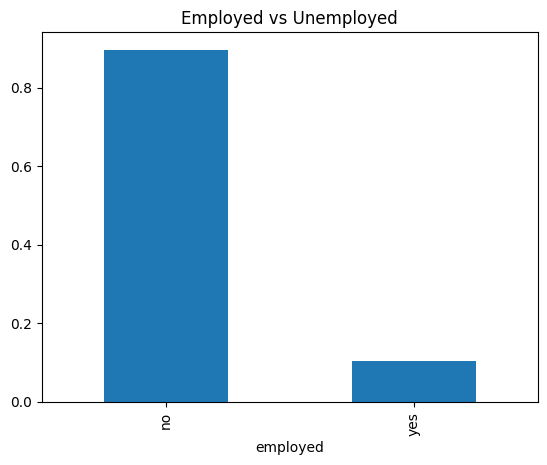

In [ ]:
#print check for class imbalance
df5['employed'].value_counts(normalize=True).plot(kind='bar', title='Employed vs Unemployed')

In [97]:
#one hot encode categorical columns
df6 = df5.copy()
print("One hot encoding categorical columns")
df6 = pd.get_dummies(df6, columns=catagorical_columns, drop_first=True)
print("One hot encoding done")
df6.head()


One hot encoding categorical columns
One hot encoding done


,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,...,health_poor,adl_normal,region_northeast,region_other,region_west,gender_male,married_yes,employed_yes,insurance_yes,medicaid_yes
0,5,0,0,0,0,1,2,6.9,6,2.8810,...,False,True,False,True,False,True,True,True,True,False
1,1,0,2,0,2,0,2,7.4,10,2.7478,...,False,True,False,True,False,False,True,False,True,False
2,13,0,0,0,3,3,4,6.6,10,0.6532,...,True,False,False,True,False,False,False,False,False,True
3,16,0,5,0,1,1,2,7.6,3,0.6588,...,True,False,False,True,False,True,True,False,True,False
4,3,0,0,0,0,0,2,7.9,6,0.6588,...,False,False,False,True,False,False,True,False,True,False


In [98]:

# Check the memory usage after one hot encoding
print("Checking memory usage after one hot encoding")
print(f'before: {mem_usage(df5): .2f} vs after: {mem_usage(df6): .2f}')
print(f'Dataframe size reduced by: {((mem_usage(df5)-mem_usage(df6))*100)/mem_usage(df5): .2f} percentage')


Checking memory usage after one hot encoding
before:  0.11 vs after:  0.12
Dataframe size reduced by: -9.52 percentage


## task 9: **Export the dataframe** as a new CSV file `NSMES1988new.csv` and store it locally for future use in other assignments.


In [106]:
#write to csv
df5.to_csv("../dataset/NSMES1988new.csv", index=False)

## task 10: **Write a short report** on the visual observations of the data.

## task 11: **stretch goal** create plots to demonstrate your observations.